Implemente utilizando Polars los siguientes algoritmos para encontrar reglas de asociación:· 

·        Apriori

·         FP-Growth

Compare ambos algoritmos con el mismo conjunto de datos



## Reglas de asociación

1 {a,b,c}

2 {a,b}

3 {a,c,d}

4 {a}

5 {b,c}

6 {b,c,d}

a continuación el algoritmo para la probabilidad condicional superior al 50% del anterior conjunto de datos


In [ ]:
#pip install polar
import polars as pl

df = pl.DataFrame({
    "a": [1,1,1,1,0,0],
    "b": [1,1,0,0,1,1],
    "c": [1,0,1,0,1,1],
    "d":[0,0,1,0,0,1]
})

def proba(p1,p2):
  pr=df.filter((df[p1]==1) & (df[p2]==1))
  pc=pr.shape[0]/df[p2].sum()
  return "prob de: {"+p1+"} -> {"+p2+"} = "+str(pc)


print(proba("a","b"))
print(proba("a","c"))
print(proba("a","d"))

print(proba("b","a"))
print(proba("b","c"))
print(proba("b","d"))


print(proba("c","a"))
print(proba("c","b"))
print(proba("c","d"))

print(proba("d","a"))
print(proba("d","b"))
print(proba("d","c"))



prob de: {a} -> {b} = 0.5
prob de: {a} -> {c} = 0.5
prob de: {a} -> {d} = 0.5
prob de: {b} -> {a} = 0.5
prob de: {b} -> {c} = 0.75
prob de: {b} -> {d} = 0.5
prob de: {c} -> {a} = 0.5
prob de: {c} -> {b} = 0.75
prob de: {c} -> {d} = 1.0
prob de: {d} -> {a} = 0.25
prob de: {d} -> {b} = 0.25
prob de: {d} -> {c} = 0.5


In [ ]:
#pip install polar
import polars as pl
import time

start_time = time.perf_counter()

df = pl.DataFrame({
    "a": [1,1,0,0,1],
    "b": [0,1,1,1,0],
    "c": [1,1,0,1,1],
    "d": [1,0,0,0,0],
    "e": [0,0,0,0,1],
    "f": [1,1,1,0,1],
    "g": [1,0,0,0,0],
    "h": [0,0,1,0,0],
    "i": [1,0,0,0,0],
    "j": [0,0,1,0,0],
    "k": [0,0,1,0,0],
    "l": [0,1,0,0,1],
    "m": [1,1,0,0,1],
    "o": [0,1,1,0,0],
    "p": [1,0,0,1,1]
})

#función que retorna la cantidad de veces que las letras estan ocurriendo en un mismo vector columna
def proba(letras):
  pr=df.select(letras)
  aa = pr.with_columns((pl.struct(pl.all()).map_elements(lambda row: len(set(row.values())) == 1, return_dtype=pl.Boolean)).alias("igual"))
  bb=aa.filter(aa["igual"])
  return bb.shape[0]


#probabilidad condicionada
numerador=['m']
denominador=['a','c']

print("P("+str(numerador)+'/'+str(denominador)+')='+str(proba(numerador+denominador)/proba(denominador)))

#parte de código que da el tiempo de ejecución
end_time = time.perf_counter()
elapsed_time = end_time - start_time
print(f"Tiempo de ejecución: {elapsed_time:.6f} segundos")


P(['m']/['a', 'c'])=1.0
Tiempo de ejecución: 0.005902 segundos


### Tarea Probabilidad condicionada

comparar los dos algoritmos en tiempo y precisión para la probabilidad condicionada, la parte anterior falta por compleemntar la probabilidad condicionada.



```
{f,a,c,d,g,l,m,p}
{a,b,c,f,l,m,o}
{b,f,h,j,o}
{b,c,k,s,p}
{a,f,c,e,l,p,m,n}

```

## Probabilidad Condicionada

La **probabilidad condicionada** se define como la probabilidad de que ocurra un evento **A**, dado que ya ha ocurrido otro evento **B**. Se denota como **P(A | B)** y se calcula con la siguiente fórmula:  

$$ P(A | B) = \frac{P(A \cap B)}{P(B)}$$

### Explicación de la fórmula
- **P(A | B)** → Probabilidad de que ocurra A dado que B ya ocurrió.  
- **P(A ∩ B)** → Probabilidad de que A y B ocurran simultáneamente.  
- **P(B)** → Probabilidad de que ocurra B (siempre que \( P(B) > 0 \)).  

---


In [ ]:
# función para encontrar la probabilidad condicionada

import time
start_time = time.perf_counter()

a=['f','a','c','d','g','i','m','p']
b=['a','b','c','f','l','m','o']
c=['b','f','h','j','o']
d=['b','c','k','s','p']
e=['a','f','c','e','l','p','m','n']

#función que concatena todas las listas definidas para encontrar su frecuencia
def concatenar(vec):
  return [item for sublist in vec for item in sublist]

union=concatenar([a,b,c,d,e])

#se obtiene la frecuencia de aparición de cada letra dentro de los listados definidos
counts={}
for item in union:
    counts[item] = counts.get(item, 0) + 1

print('Frecuencia de letras: '+str(counts))

#función que retorna el nuevo listado de palabras de acuerdo con su frecuencia de aparición
def nueva_lista(lista,delta):
  nueva_lista=[]
  for i in range(len(lista)):
    if counts[lista[i]]>delta:
      nueva_lista.append(lista[i])
  return nueva_lista

a1=nueva_lista(a,2)
b1=nueva_lista(b,2)
c1=nueva_lista(c,2)
d1=nueva_lista(d,2)
e1=nueva_lista(e,2)

listado=[a1,b1,c1,d1,e1]

print("Nuevos arreglos:"+str(listado))

#función que retorna la 'probabilidad' o cuenta de aparición de cada letra o conjunto de letras
def prob(letras,listado):
  cuenta=0
  for i in range(len(listado)):
    res=all(item in listado[i] for item in letras)
    if res:
      cuenta+=1
  return cuenta

#probabilidad condicionada
numerador=['m']
denominador=['a','c']

print("P("+str(numerador)+'/'+str(denominador)+')='+str(prob(numerador+denominador,listado)/prob(denominador,listado)))


end_time = time.perf_counter()
elapsed_time = end_time - start_time
print(f"Tiempo de ejecución: {elapsed_time:.6f} segundos")

Frecuencia de letras: {'f': 4, 'a': 3, 'c': 4, 'd': 1, 'g': 1, 'i': 1, 'm': 3, 'p': 3, 'b': 3, 'l': 2, 'o': 2, 'h': 1, 'j': 1, 'k': 1, 's': 1, 'e': 1, 'n': 1}
Nuevos arreglos:[['f', 'a', 'c', 'm', 'p'], ['a', 'b', 'c', 'f', 'm'], ['b', 'f'], ['b', 'c', 'p'], ['a', 'f', 'c', 'p', 'm']]
P(['m']/['a', 'c'])=1.0
Tiempo de ejecución: 0.003655 segundos


## Comparación de Algoritmos Apriori y FP-Growth para Reglas de Asociación

### Apriori

El algoritmo Apriori es una técnica fundamental en minería de datos para descubrir conjuntos frecuentes de ítems dentro de grandes bases de datos transaccionales. Su objetivo principal es identificar grupos de productos que aparecen juntos con una frecuencia mínima especificada, conocida como soporte mínimo. Para ello, Apriori utiliza una estrategia iterativa que explora primero los ítems individuales frecuentes y luego construye progresivamente conjuntos más grandes, descartando aquellos que no cumplen con el soporte mínimo. Esta poda temprana reduce significativamente el espacio de búsqueda, haciendo el proceso más eficiente.

Además de encontrar estos conjuntos frecuentes, Apriori sirve como base para generar reglas de asociación, que revelan relaciones interesantes entre productos, como “si un cliente compra X, es probable que también compre Y”. Estas reglas se evalúan con métricas como confianza y lift para medir su relevancia y utilidad. En resumen, Apriori ayuda a descubrir patrones ocultos en los datos de compra que pueden utilizarse para estrategias de marketing, diseño de inventarios o recomendaciones personalizadas.

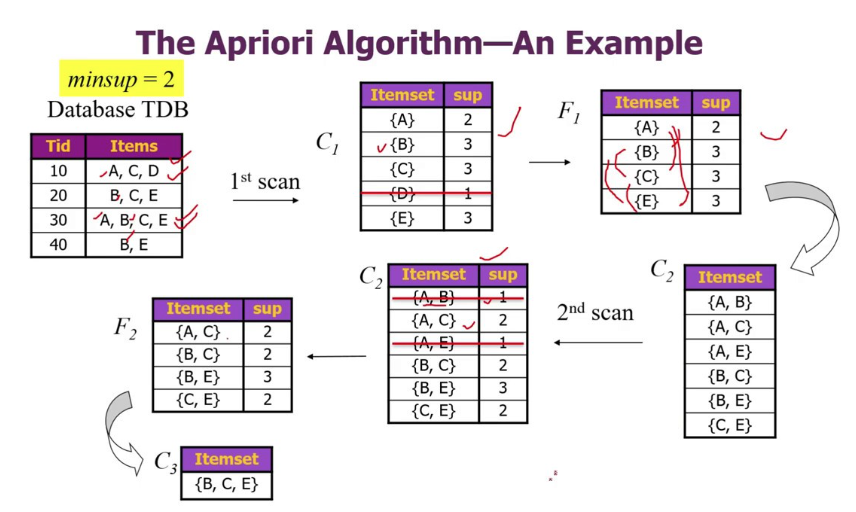

### FP-Growth

El algoritmo FP-Growth (Frequent Pattern Growth) es otro método eficiente para encontrar conjuntos frecuentes de ítems en bases de datos transaccionales, pero a diferencia de Apriori, no genera candidatos explícitos. En vez de eso, FP-Growth construye una estructura compacta llamada árbol FP (Frequent Pattern tree) que almacena toda la información de las transacciones de manera comprimida, preservando la frecuencia de los ítems. Luego, explora este árbol para extraer los patrones frecuentes sin necesidad de escanear repetidamente la base de datos ni generar combinaciones candidatas, lo que reduce considerablemente el tiempo de cómputo y mejora el rendimiento en datasets grandes.

Este método es especialmente útil cuando el conjunto de datos es muy voluminoso y Apriori se vuelve lento debido a la explosión combinatoria de candidatos. FP-Growth puede descubrir rápidamente todos los patrones frecuentes y, al igual que Apriori, se puede usar para generar reglas de asociación que ayuden a entender relaciones entre productos o comportamientos en los datos, facilitando la toma de decisiones en áreas como marketing, inventarios y recomendaciones.

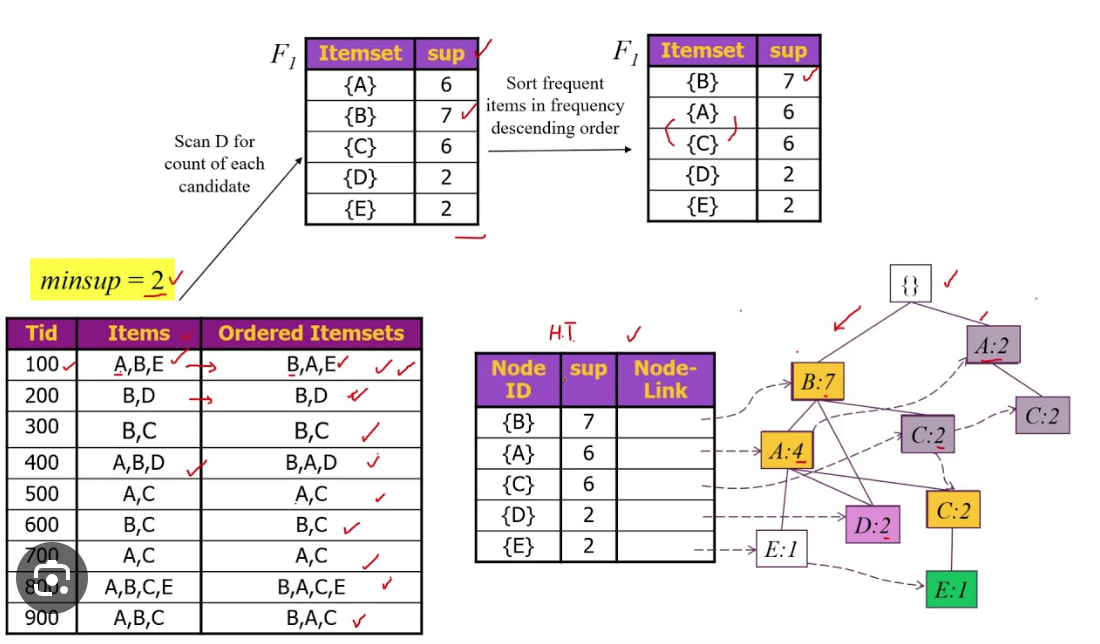

## Análisis de los algoritmos implementados

### Algoritmo Apriori

**Características:**
- Basado en generación y testeo de conjuntos de ítems frecuentes
- Utiliza la propiedad "downward closure" (si un conjunto no es frecuente, ninguno de sus supersets lo será)
- Requiere múltiples pasadas sobre la base de datos
- Fácil de implementar pero computacionalmente costoso

**Ventajas:**
- Simple de entender e implementar
- Bueno para conjuntos de datos pequeños
- Genera todos los conjuntos de ítems frecuentes

**Desventajas:**
- Ineficiente para bases de datos grandes
- Muchas operaciones de E/S al escanear la base de datos repetidamente
- Dificultad con conjuntos de ítems largos

### Algoritmo FP-Growth

**Características:**
- Basado en la estructura de datos FP-tree (Frequent Pattern tree)
- Comprime la base de datos en una estructura en árbol
- Solo requiere dos pasadas sobre la base de datos
- Más eficiente en memoria y tiempo de ejecución

**Ventajas:**
- Más rápido que Apriori, especialmente en datos grandes
- Solo necesita dos escaneos de la base de datos
- Buen rendimiento con conjuntos de ítems largos
- Eficiente en el uso de memoria gracias a la compresión FP-tree

**Desventajas:**
- Más complejo de implementar
- Construcción del FP-tree puede ser costosa para algunos datasets
- Menos intuitivo que Apriori

### Comparación directa

| Criterio         | Apriori                          | FP-Growth                       |
|------------------|----------------------------------|---------------------------------|
| Velocidad        | Lento (múltiples escaneos)       | Rápido (solo 2 escaneos)        |
| Uso de memoria   | Moderado                         | Eficiente (gracias a FP-tree)   |
| Escalabilidad    | Limitada para datasets grandes   | Mejor escalabilidad            |
| Implementación   | Simple                           | Compleja                       |
| Conjuntos largos | Ineficiente                      | Maneja mejor conjuntos largos  |

### Recomendación

1. **Si se requiere simplicidad**: Apriori
2. **Si se requiere eficiencia**: FP-Growth


In [1]:
pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 5.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth
import time
import matplotlib.pyplot as plt

#ejemplo con datos

transactions = [
    ['milk', 'bread', 'butter'],
    ['beer', 'diapers', 'milk'],
    ['bread', 'butter'],
    ['beer', 'diapers'],
    ['milk', 'diapers', 'bread', 'butter'],
]

# Preprocesamiento
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Configuración común
min_support = 0.01


In [4]:
# Función de medir eficiencia
def test_algorithm(algo, name):
    start_time = time.time()
    freq_items = algo(df, min_support=min_support, use_colnames=True)
    exec_time = time.time() - start_time
    print(f"{name}: {len(freq_items)} itemsets frecuentes, tiempo: {exec_time:.4f}s")
    return exec_time, len(freq_items)

#  Apriori
apriori_time, apriori_count = test_algorithm(apriori, "Apriori")

#  FP-Growth
fpgrowth_time, fpgrowth_count = test_algorithm(fpgrowth, "FP-Growth")


improvement = (apriori_time - fpgrowth_time) / apriori_time * 100
print(f"\nFP-Growth fue {improvement:.1f}% más rápido que Apriori")

Apriori: 19 itemsets frecuentes, tiempo: 0.0149s
FP-Growth: 19 itemsets frecuentes, tiempo: 0.0026s

FP-Growth fue 82.5% más rápido que Apriori


#### Gráfico de comparación en el rendimiento entre ambos algoritmos

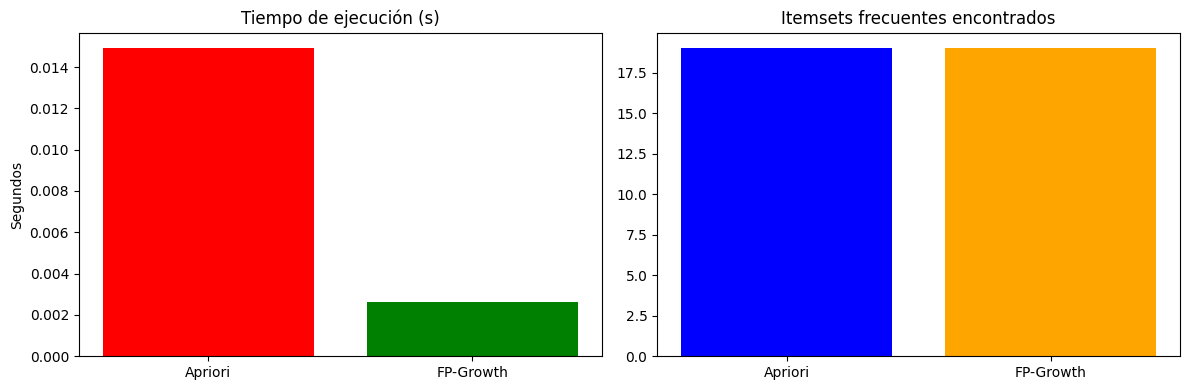

In [5]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Tiempo de ejecución
ax1.bar(['Apriori', 'FP-Growth'], [apriori_time, fpgrowth_time], color=['red', 'green'])
ax1.set_title('Tiempo de ejecución (s)')
ax1.set_ylabel('Segundos')


ax2.bar(['Apriori', 'FP-Growth'], [apriori_count, fpgrowth_count], color=['blue', 'orange'])
ax2.set_title('Itemsets frecuentes encontrados')

plt.tight_layout()
plt.show()